# Project Token Analysis Notebook

This notebook loads the projects CSV files, focuses on the 'id', 'title', and 'objective' fields, and analyzes token counts using OpenAI's tokenizer for text-embedding-3-small.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tiktoken import get_encoding

# Set style for plots
plt.style.use('ggplot')

# Get the tokenizer for text-embedding-3-small
encoding = get_encoding("cl100k_base")  # This is the encoding used by text-embedding-3-small

In [2]:
df = pd.read_pickle("../data/horizon_projects.pkl")

df.head()

,id,title,objective,contentUpdateDate,title_length,objective_length
0,101006382,Mission-Oriented SwafS to Advance Innovation t...,While most SwafS initiatives have contributed ...,2024-07-22 12:39:54,64,1448
1,633080,Monitoring Atmospheric Composition and Climate...,MACC-III is the last of the pre-operational st...,2022-08-16 16:46:44,51,1932
2,633212,Aging Lungs in European Cohorts,This programme of work will advance the unders...,2023-10-25 16:11:30,31,1990
3,879534,The Enterprise Europe Network Baden-Wuerttembe...,BW-KAM 5 will implement tested and tailored in...,2022-10-28 14:08:00,106,754
4,743826,The Enterprise Europe Network Baden-Wuerttembe...,By providing Key Account Management and Enhanc...,2022-08-15 13:07:16,137,565


In [3]:
# # Load the CSV files
# df_14_20 = pd.read_csv("../data/projects_14_20.csv", sep=';', quotechar='"', escapechar='\\')
# df_21_27 = pd.read_csv("../data/projects_21_27.csv", sep=';', quotechar='"', escapechar='\\')

# display(df_14_20.head())

# # Combine the two dataframes and only keep the columns 'id', 'title', and 'objective'
# df = pd.concat([df_14_20[['id', 'title', 'objective']], df_21_27[['id', 'title', 'objective']]])

# print(f"Loaded {len(df)} projects")
# df.head()

## Token Count Analysis

In [4]:
# Function to count tokens
def count_tokens(text):
    return len(encoding.encode(text))

# Count tokens for title and objective
df['title_tokens'] = df['title'].apply(count_tokens)
df['objective_tokens'] = df['objective'].apply(count_tokens)
df['total_tokens'] = df['title_tokens'] + df['objective_tokens']

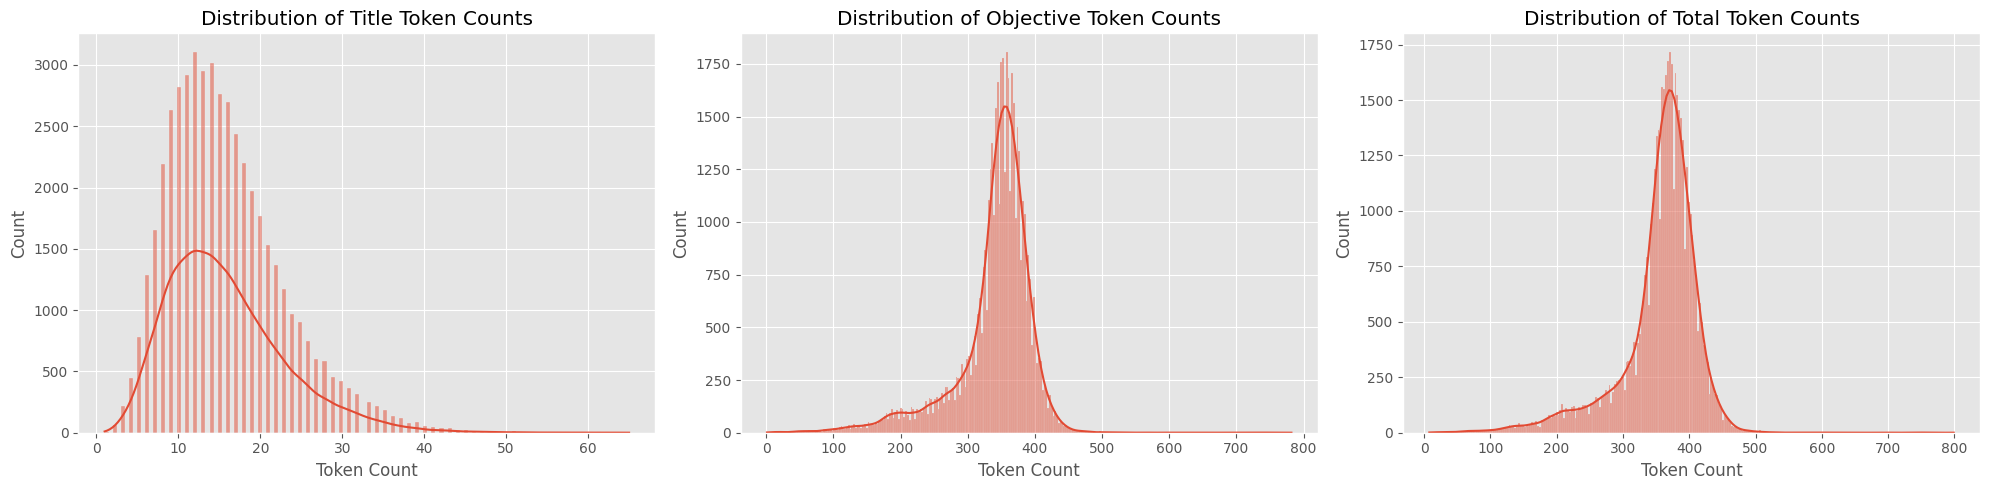

In [5]:
# Visualize the distribution of token counts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df['title_tokens'], kde=True, ax=ax1)
ax1.set_title('Distribution of Title Token Counts')
ax1.set_xlabel('Token Count')

sns.histplot(df['objective_tokens'], kde=True, ax=ax2)
ax2.set_title('Distribution of Objective Token Counts')
ax2.set_xlabel('Token Count')

sns.histplot(df['total_tokens'], kde=True, ax=ax3)
ax3.set_title('Distribution of Total Token Counts')
ax3.set_xlabel('Token Count')

plt.tight_layout()
plt.show()

In [6]:
# Calculate percentage of projects exceeding token limit
token_limit = 8191  # Maximum for text-embedding-3-small
exceed_limit = (df['total_tokens'] > token_limit).sum()
percentage_exceed = (exceed_limit / len(df)) * 100

print(f"Number of projects exceeding {token_limit} tokens: {exceed_limit}")
print(f"Percentage of projects exceeding {token_limit} tokens: {percentage_exceed:.2f}%")

# Display projects with highest token counts
print("\nTop 5 projects with highest token counts:")
print(df.nlargest(5, 'total_tokens')[['id', 'title', 'total_tokens']])

Number of projects exceeding 8191 tokens: 0
Percentage of projects exceeding 8191 tokens: 0.00%

Top 5 projects with highest token counts:
              id                                              title  \
29810     777362  Combatting Bacterial Resistance in Europe - Cl...   
27828     821926   Improving Models for Marine EnviRonment SErvices   
46825  101070827  CITIES 4.0 - Climate Innovation Through Intera...   
25159     770141  Transition towards urban sustainability throug...   
34465     945539     Human Brain Project Specific Grant Agreement 3   

       total_tokens  
29810           799  
27828           765  
46825           765  
25159           754  
34465           753  


## Conclusion

This analysis provides insights into the token counts of project titles and objectives using OpenAI's tokenizer for text-embedding-3-small.